<a href="https://colab.research.google.com/github/alif-09/proyek_analisis_data_dicoding/blob/main/ProyekAnalisisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project with E-Commerce Public Dataset
**Nama: Alif Al Husaini**

**ID Dicoding: alif_al_husaini_yA1B**

**Email: alhusainialif@gmail.com**

## Defining Bussiness Questions

1. How do different product categories influence the average transaction value?
2. How do delivery times impact customer satisfaction ratings?
3. How can we utilize RFM segmentation to tailor marketing strategies for different customer groups, ensuring higher engagement and increased sales?



In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## 1. Data Wrangling

### 1.1 Gathering Data

In [102]:
# Load datasets from the collab directory (/content/)
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')
geolocation = pd.read_csv('/content/geolocation_dataset.csv')
order_items = pd.read_csv('/content/order_items_dataset.csv')
order_payments = pd.read_csv('/content/order_payments_dataset.csv')
order_reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
product_category_translation = pd.read_csv('/content/product_category_name_translation.csv')
customers = pd.read_csv('/content/customers_dataset.csv')

In [103]:
# Combine all datasets into a dictionary for easier management
datasets = {
    'products': products,
    'sellers': sellers,
    'geolocation': geolocation,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'orders': orders,
    'product_category_translation': product_category_translation,
    'customers': customers
}

In [104]:
# Assigning individual datasets to separate dataframe variables
orders_df = datasets['orders']
products_df = datasets['products']
sellers_df = datasets['sellers']
geolocation_df = datasets['geolocation']
order_items_df = datasets['order_items']
order_payments_df = datasets['order_payments']
order_reviews_df = datasets['order_reviews']
translation_df = datasets['product_category_translation']
customers_df = datasets['customers']

In [105]:
# Show the first few rows of each dataset to confirm they're loaded
for name, df in datasets.items():
    print(f"{name} dataset preview:")
    print(df.head(), "\n")

products dataset preview:
                         product_id  product_category_name  product_name_lenght  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria                40.00   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes                44.00   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer                46.00   
3  cef67bcfe19066a932b7673e239eb23d                  bebes                27.00   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas                37.00   

   product_description_lenght  product_photos_qty  product_weight_g  product_length_cm  \
0                      287.00                1.00            225.00              16.00   
1                      276.00                1.00           1000.00              30.00   
2                      250.00                1.00            154.00              18.00   
3                      261.00                1.00            371.00              26.00   
4                      40

### 1.2 Assessing Data


#### 1.2.1 Checking dataset sizes and missing values

In [106]:
# Check the shape and missing values for each dataset
for name, df in datasets.items():
    print(f"{name} dataset:")

    # Print shape of the dataset
    print(f"Shape (rows, columns): {df.shape}")

    # Print missing values in each column
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)

    print("\n")

products dataset:
Shape (rows, columns): (32951, 9)
Missing values in each column:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


sellers dataset:
Shape (rows, columns): (3095, 4)
Missing values in each column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


geolocation dataset:
Shape (rows, columns): (1000163, 5)
Missing values in each column:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


order_items dataset:
Shape (rows, columns): (112650, 7)
Missing values in each column:
order_id               0
order_it

The product dataset has some missing values, primarily in product categories, descriptions, and photos, which could impact product-level analysis. The sellers, geolocation, order items, and payments datasets are clean with no missing values, making them reliable for further analysis. The order reviews dataset, however, has significant missing comments and titles, which could limit customer feedback insights. The orders dataset shows missing data in delivery times for some rows, which may affect delivery performance analysis. Both the product category translation and customers datasets are complete, making them suitable for customer segmentation and product category analysis without issues.

#### 1.2.2 Checking data types of each column

In [107]:
# Check the data types for each dataset
for name, df in datasets.items():
    print(f"Data types in {name} dataset:")

    print(df.dtypes)

    print("\n")


Data types in products dataset:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Data types in sellers dataset:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object


Data types in geolocation dataset:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object


Data types in order_items dataset:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     ob

#### 1.2.3 Checking Duplicates in each dataset

In [108]:
# Check for duplicates in each dataset
for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f"{name} dataset:")
    print(f"Number of duplicate rows: {duplicates}")
    print("\n")

products dataset:
Number of duplicate rows: 0


sellers dataset:
Number of duplicate rows: 0


geolocation dataset:
Number of duplicate rows: 261831


order_items dataset:
Number of duplicate rows: 0


order_payments dataset:
Number of duplicate rows: 0


order_reviews dataset:
Number of duplicate rows: 0


orders dataset:
Number of duplicate rows: 0


product_category_translation dataset:
Number of duplicate rows: 0


customers dataset:
Number of duplicate rows: 0




**Insights:**

The data shows that most datasets do not have duplicate rows, which is good for ensuring data quality. In the geolocation dataset, the presence of 261,831 duplicate rows may be reasonable, as multiple entries with similar latitude and longitude coordinates can exist for different areas within the same city or region. This redundancy might not require immediate cleaning unless the duplicates are found to be unnecessary for the specific analysis being conducted. For accurate geospatial analysis, further examination of these duplicates is needed to ensure they reflect legitimate geographic distinctions. Other datasets have no duplicate rows, indicating good data quality overall.

### 1.3 Cleaning Data



1.   Products


In [109]:


# Drop unnecessary columns
products_df = products_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

# Handle missing values
products_df['product_category_name'] = products_df['product_category_name'].fillna('Unknown')

# Fill missing values for numeric columns with appropriate statistics
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean())

# Ensure numeric columns are in the correct format
products_df['product_weight_g'] = products_df['product_weight_g'].astype(float)
products_df['product_length_cm'] = products_df['product_length_cm'].astype(float)
products_df['product_height_cm'] = products_df['product_height_cm'].astype(float)
products_df['product_width_cm'] = products_df['product_width_cm'].astype(float)

# Check the cleaned products_df dataset
print(products_df.head())
print(f"Updated shape of products_df dataset: {products_df.shape}")


                         product_id  product_category_name  product_weight_g  product_length_cm  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria            225.00              16.00   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes           1000.00              30.00   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer            154.00              18.00   
3  cef67bcfe19066a932b7673e239eb23d                  bebes            371.00              26.00   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas            625.00              20.00   

   product_height_cm  product_width_cm  
0              10.00             14.00  
1              18.00             20.00  
2               9.00             15.00  
3               4.00             26.00  
4              17.00             13.00  
Updated shape of products_df dataset: (32951, 6)


I cleaned the products_df dataset by dropping unnecessary columns like product_name_length, product_description_length, and product_photos_qty, as they are irrelevant to my analysis questions. I filled missing values in the product_category_name column with 'Unknown' to ensure all products are categorized and used the mean for numeric columns to maintain data integrity. Then I converted numeric columns to their appropriate data types for consistency, preparing the dataset for accurate insights on customer grouping, geographic trends, and the impact of product categories on transaction values.

In [110]:
# Check for missing values and duplicates
print("Products Dataset Missing Values:")
print(products_df.isnull().sum())
print(f"Number of duplicate rows in products dataset: {products_df.duplicated().sum()}")

Products Dataset Missing Values:
product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64
Number of duplicate rows in products dataset: 0


2. Orders_dataset


In [111]:
total_orders = orders_df.shape[0]
delivered_orders = orders_df[orders_df['order_status'] == 'delivered'].shape[0]

percentage_delivered = (delivered_orders / total_orders) * 100

print(f"Percentage of delivered orders: {percentage_delivered:.2f}%")


Percentage of delivered orders: 97.02%


Since 97.02% of the orders are marked as 'delivered,' I decided to focus my analysis on only these completed transactions. This choice allows me to accurately assess the impact of delivery times on customer satisfaction ratings while excluding incomplete orders, which may skew the results. Consequently, I will remove any orders that are not categorized as delivered.

In [112]:
delivered_orders_df = orders_df[orders_df['order_status'] == 'delivered'].copy()

# Convert the necessary timestamp columns to datetime format using .loc to avoid SettingWithCopyWarning
delivered_orders_df.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(delivered_orders_df['order_purchase_timestamp'], errors='coerce')
delivered_orders_df.loc[:, 'order_delivered_customer_date'] = pd.to_datetime(delivered_orders_df['order_delivered_customer_date'], errors='coerce')

# Filter out rows where either the purchase timestamp or the delivered customer date is missing (NaT)
delivered_orders_df = delivered_orders_df.dropna(subset=['order_purchase_timestamp', 'order_delivered_customer_date'])

# Check the shape of the filtered dataset
print("Shape of delivered orders with complete date information:", delivered_orders_df.shape)

# Preview the first few rows of the cleaned dataframe
delivered_orders_df.head()


Shape of delivered orders with complete date information: (96470, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00




2. order_reviews



To analyze the order_reviews dataset, I will check the percentage of reviews that contain comments and titles first

In [113]:
# Calculate the number of total reviews
total_reviews = order_reviews_df.shape[0]

# Calculate the number of reviews with comments and titles
reviews_with_titles = order_reviews_df['review_comment_title'].notnull().sum()
reviews_with_comments = order_reviews_df['review_comment_message'].notnull().sum()

# Calculate the percentage of reviews with titles and comments
percentage_titles = (reviews_with_titles / total_reviews) * 100
percentage_comments = (reviews_with_comments / total_reviews) * 100

# Display the results
print(f"Percentage of reviews with titles: {percentage_titles:.2f}%")
print(f"Percentage of reviews with comments: {percentage_comments:.2f}%")


Percentage of reviews with titles: 11.66%
Percentage of reviews with comments: 41.30%



Based on the persentages shows above, where only 11.66% of reviews included titles and 41.30% included comments, it's reasonable to drop the title column since it contributes minimal value to the dataset. For the comments, since a significant portion of them is missing, filling in the empty comments with "no comment".

In [114]:
# Drop the review_comment_title column
order_reviews_df = order_reviews_df.drop(columns=['review_comment_title'])

# Fill missing values in review_comment_message with 'no comment'
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].fillna('no comment')

In [115]:
# Check the updated order_reviews dataset
print(order_reviews_df.head())
print(f"Updated shape of order_reviews dataset: {order_reviews_df.shape}")

                          review_id                          order_id  review_score  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb             4   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33             5   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b             5   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b             5   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1             5   

                              review_comment_message review_creation_date review_answer_timestamp  
0                                         no comment  2018-01-18 00:00:00     2018-01-18 21:46:59  
1                                         no comment  2018-03-10 00:00:00     2018-03-11 03:05:13  
2                                         no comment  2018-02-17 00:00:00     2018-02-18 14:36:24  
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00    

## 2. Exploratory Data Analysis

### 2.1 Products Dataset

In [116]:
products_df.sample(5)

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
24852,a4a04b698e98a60246c2ecdbe629c447,bebes,1100.00,26.00,22.00,13.00
2809,8a8ca51f9f9e167a56b3469d64492632,malas_acessorios,675.00,29.00,23.00,18.00
3820,2ace3826b9a1b13030adc77ae9ae7902,telefonia_fixa,750.00,30.00,10.00,20.00
9624,d076ce587de2ab3cb36f6c34f5ec1c8c,moveis_sala,6100.00,55.00,13.00,51.00
16392,fa2954f5c67b3561a247d4b5329b2cca,moveis_decoracao,1000.00,20.00,20.00,11.00


In [117]:
products_df.describe(include='all')

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.00,32951.00,32951.00,32951.00
unique,32951,74,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN
mean,NaN,NaN,2276.47,30.82,16.94,23.20
std,NaN,NaN,4281.91,16.91,13.64,12.08
min,NaN,NaN,0.00,7.00,2.00,6.00
25%,NaN,NaN,300.00,18.00,8.00,15.00
50%,NaN,NaN,700.00,25.00,13.00,20.00
75%,NaN,NaN,1900.00,38.00,21.00,30.00


In [118]:
products_df.product_id.is_unique

True

In [119]:
duplicate_product_ids = products_df[products_df['product_id'].duplicated(keep=False)]
print(duplicate_product_ids)

Empty DataFrame
Columns: [product_id, product_category_name, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


### 2.2 Orders

Distribution of Order Status

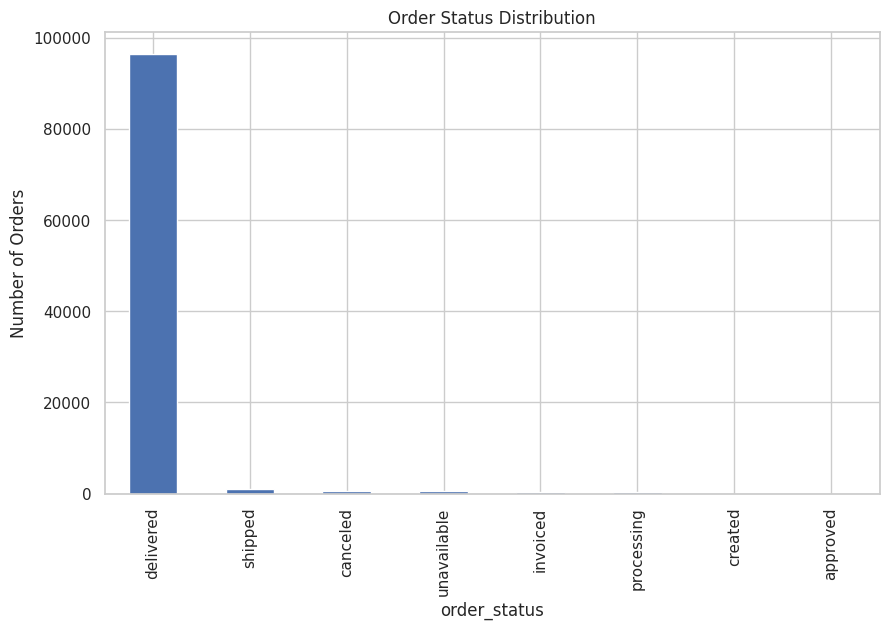

In [120]:
order_status_counts = orders_df['order_status'].value_counts()
order_status_counts.plot(kind='bar', title='Order Status Distribution', figsize=(10, 6))
plt.ylabel('Number of Orders')
plt.show()


Order Purchase Date Distribution

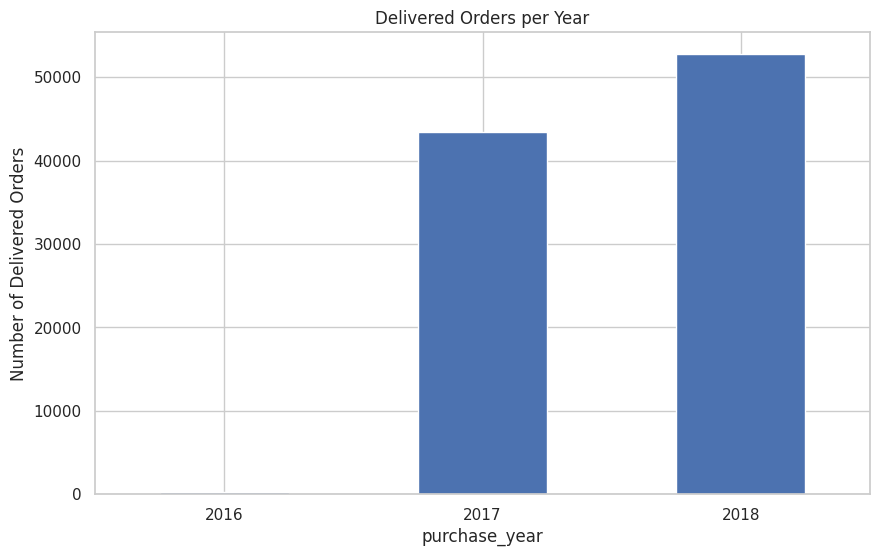

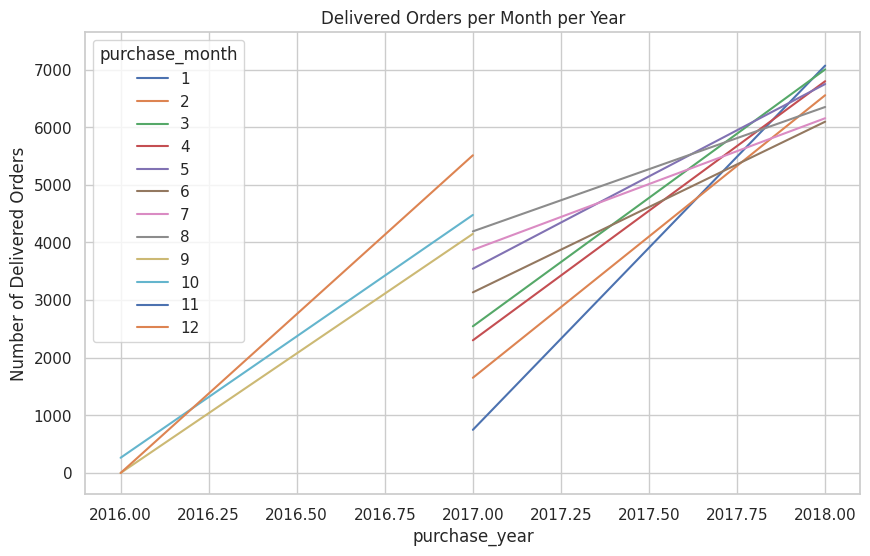

In [121]:
# Ensure the order_purchase_timestamp is in datetime format
delivered_orders_df['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_df['order_purchase_timestamp'])

# Extract year and month from order_purchase_timestamp
delivered_orders_df['purchase_year'] = delivered_orders_df['order_purchase_timestamp'].dt.year
delivered_orders_df['purchase_month'] = delivered_orders_df['order_purchase_timestamp'].dt.month

# Convert purchase_year to integer and remove commas if any
delivered_orders_df['purchase_year'] = delivered_orders_df['purchase_year'].astype(int)

# Orders per year (for delivered orders)
orders_per_year = delivered_orders_df.groupby('purchase_year')['order_id'].count()
orders_per_year.plot(kind='bar', title='Delivered Orders per Year', figsize=(10, 6))
plt.ylabel('Number of Delivered Orders')
plt.xticks(rotation=0)
plt.show()

# Orders per month (by year) for delivered orders
orders_per_month = delivered_orders_df.groupby(['purchase_year', 'purchase_month'])['order_id'].count().unstack()
orders_per_month.plot(kind='line', title='Delivered Orders per Month per Year', figsize=(10, 6))
plt.ylabel('Number of Delivered Orders')
plt.xticks(rotation=0)
plt.show()

Delivery Time

Delivery Time Statistics (in days):
count   96470.00
mean       12.09
std         9.55
min         0.00
25%         6.00
50%        10.00
75%        15.00
max       209.00
Name: delivery_time_days, dtype: float64


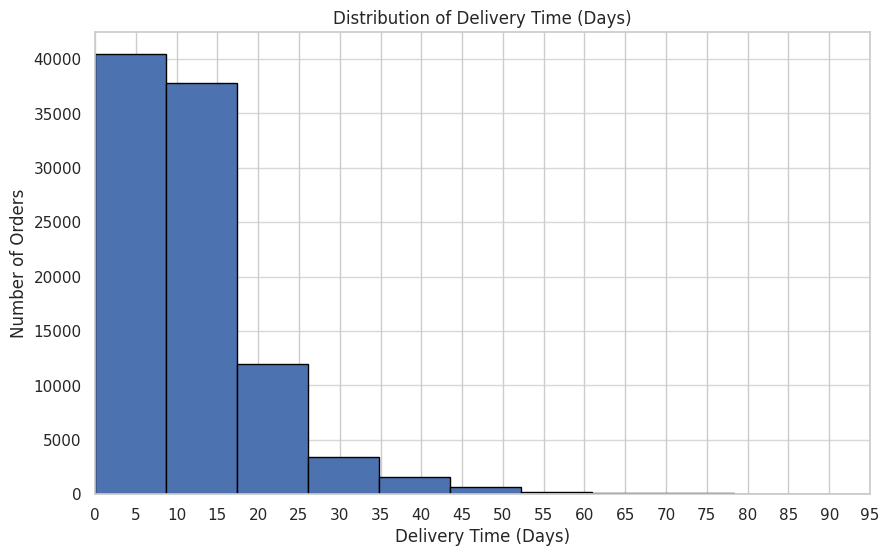

In [122]:
# Convert the necessary timestamp columns to datetime format
delivered_orders_df['order_purchase_timestamp'] = pd.to_datetime(delivered_orders_df['order_purchase_timestamp'], errors='coerce')
delivered_orders_df['order_delivered_customer_date'] = pd.to_datetime(delivered_orders_df['order_delivered_customer_date'], errors='coerce')



# Calculate delivery time in days, ensuring there are no NaT values
delivered_orders_df['delivery_time_days'] = (delivered_orders_df['order_delivered_customer_date'] - delivered_orders_df['order_purchase_timestamp']).dt.days

# Explore statistics of delivery time
delivery_time_stats = delivered_orders_df['delivery_time_days'].describe()
print("Delivery Time Statistics (in days):")
print(delivery_time_stats)

# Plot histogram of delivery times
plt.figure(figsize=(10, 6))
delivered_orders_df['delivery_time_days'].hist(bins=24, edgecolor='black')
plt.title('Distribution of Delivery Time (Days)')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Number of Orders')

plt.xlim(0, 90)
plt.xticks(range(0, 100, 5))
plt.grid(axis='y', alpha=0.75)

plt.show()




### 2.3 Customers

Distribution of Customers by City

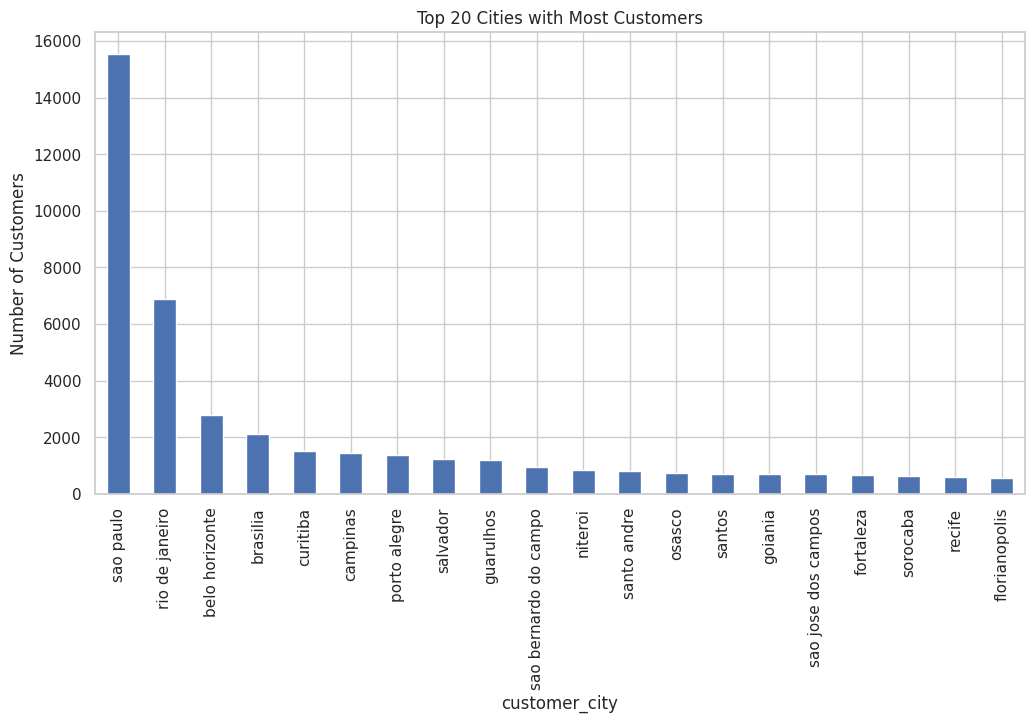

In [123]:
# Customers by city
customers_per_city = customers_df['customer_city'].value_counts().head(20)
customers_per_city.plot(kind='bar', title='Top 20 Cities with Most Customers', figsize=(12, 6))
plt.ylabel('Number of Customers')
plt.show()


Distribution of Customers by State

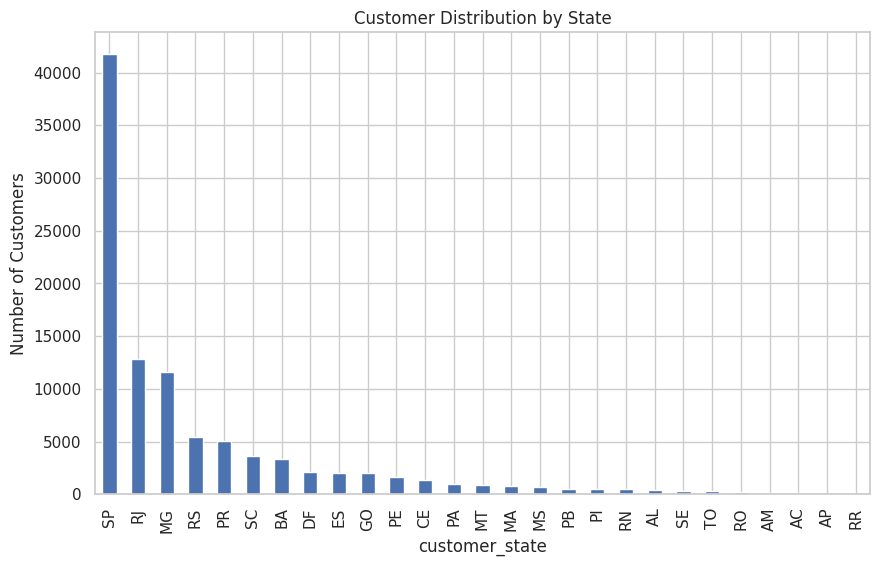

In [124]:
# Customers by state
customers_per_state = customers_df['customer_state'].value_counts()
customers_per_state.plot(kind='bar', title='Customer Distribution by State', figsize=(10, 6))
plt.ylabel('Number of Customers')
plt.show()


Customer Zip Code Analysis

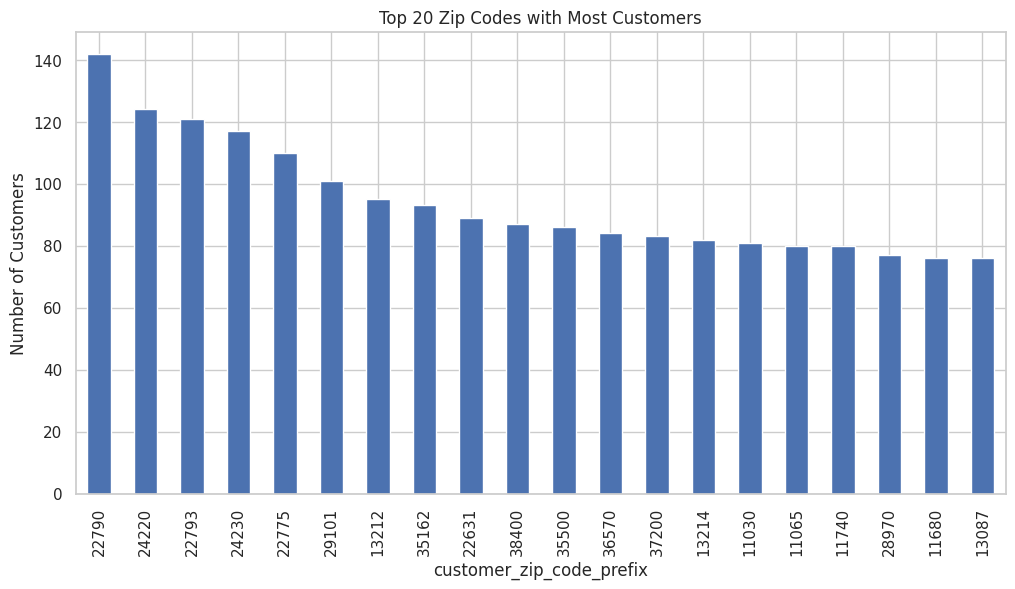

In [125]:
# Customers by zip code
customers_zip_code_distribution = customers_df['customer_zip_code_prefix'].value_counts().head(20)
customers_zip_code_distribution.plot(kind='bar', title='Top 20 Zip Codes with Most Customers', figsize=(12, 6))
plt.ylabel('Number of Customers')
plt.show()


### 2.4 Order Items

Total Purchase Price

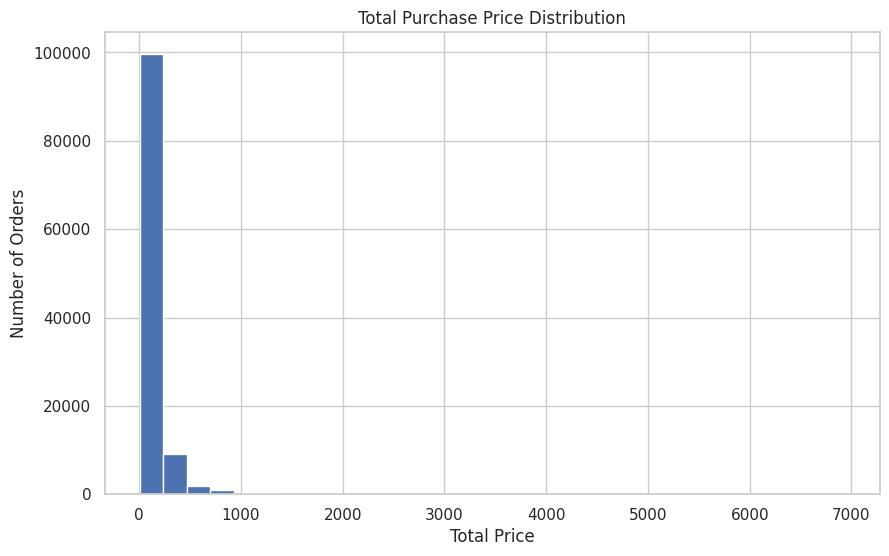

In [126]:
# Calculate total purchase price
order_items_df['total_price'] = order_items_df['price'] + order_items_df['freight_value']
order_items_df['total_price'].hist(bins=30, figsize=(10, 6))
plt.title('Total Purchase Price Distribution')
plt.xlabel('Total Price')
plt.ylabel('Number of Orders')
plt.show()


Top Products Sold

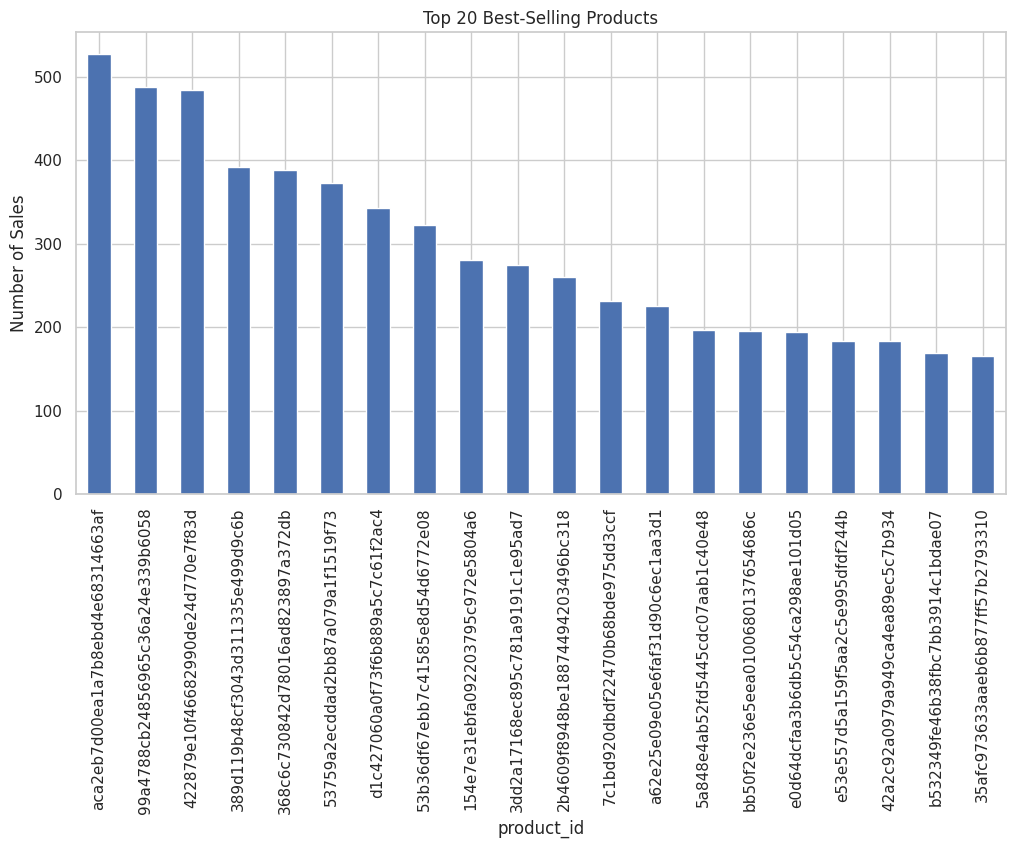

In [127]:
# Analyze top products sold
product_sales = order_items_df['product_id'].value_counts().head(20)
product_sales.plot(kind='bar', title='Top 20 Best-Selling Products', figsize=(12, 6))
plt.ylabel('Number of Sales')
plt.show()


Average Freight Value per Product Category

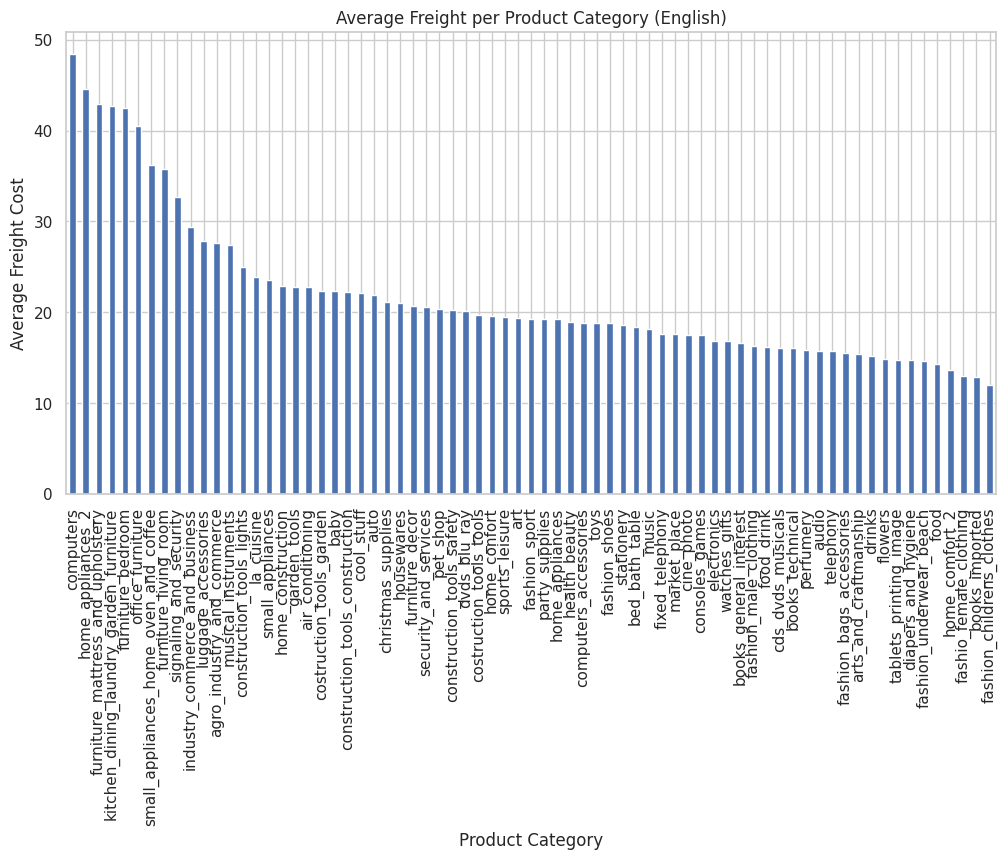

In [128]:
order_items_products = pd.merge(order_items_df, products_df, on='product_id')

# Merge with the translation DataFrame
order_items_products = pd.merge(order_items_products, translation_df, left_on='product_category_name', right_on='product_category_name', how='left')

# Calculate average freight per product category using English names
avg_freight_per_category = order_items_products.groupby('product_category_name_english')['freight_value'].mean()

# Sort values for better visualization
avg_freight_per_category = avg_freight_per_category.sort_values(ascending=False)

# Visualize the average freight costs
avg_freight_per_category.plot(kind='bar', title='Average Freight per Product Category (English)', figsize=(12, 6))
plt.ylabel('Average Freight Cost')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.show()

In [129]:
# Merge Orders with Order Items for delivered orders
delivered_orders_items_merged = pd.merge(delivered_orders_df, order_items_df, on='order_id')

# Merge with Products
delivered_orders_items_products_merged = pd.merge(delivered_orders_items_merged, products_df, on='product_id')

# Merge with Customers
delivered_orders_customers_merged = pd.merge(delivered_orders_items_products_merged, customers_df, on='customer_id')

# Merge with translation to use English product category names
delivered_orders_customers_merged = pd.merge(delivered_orders_customers_merged, translation_df,
                                              left_on='product_category_name',
                                              right_on='product_category_name',
                                              how='left')

# Merge with Order Reviews
merged_data = pd.merge(delivered_orders_customers_merged, order_reviews_df, on='order_id', how='left')

# Check if the merged DataFrame with reviews is correct
print(merged_data.head())

# Save the merged DataFrame to a CSV file
merged_data.to_csv('merged_data.csv', index=False)


                           order_id                       customer_id order_status  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d    delivered   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef    delivered   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089    delivered   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82    delivered   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c    delivered   

  order_purchase_timestamp    order_approved_at order_delivered_carrier_date  \
0      2017-10-02 10:56:33  2017-10-02 11:07:15          2017-10-04 19:55:00   
1      2018-07-24 20:41:37  2018-07-26 03:24:27          2018-07-26 14:31:00   
2      2018-08-08 08:38:49  2018-08-08 08:55:23          2018-08-08 13:50:00   
3      2017-11-18 19:28:06  2017-11-18 19:45:59          2017-11-22 13:39:59   
4      2018-02-13 21:18:39  2018-02-13 22:20:29          2018-02-14 19:46:34   

  

## 3. Visualization and Explanatory Analysis

### 3.1 How do different product categories influence the average transaction value?

Top 10 Average Transaction Values by Product Category:
product_category_name_english
computers                               1147.49
small_appliances_home_oven_and_coffee    674.60
home_appliances_2                        508.63
agro_industry_and_commerce               369.92
musical_instruments                      310.16
small_appliances                         300.87
fixed_telephony                          233.90
construction_tools_safety                232.26
furniture_bedroom                        226.98
watches_gifts                            215.65
Name: total_price, dtype: float64


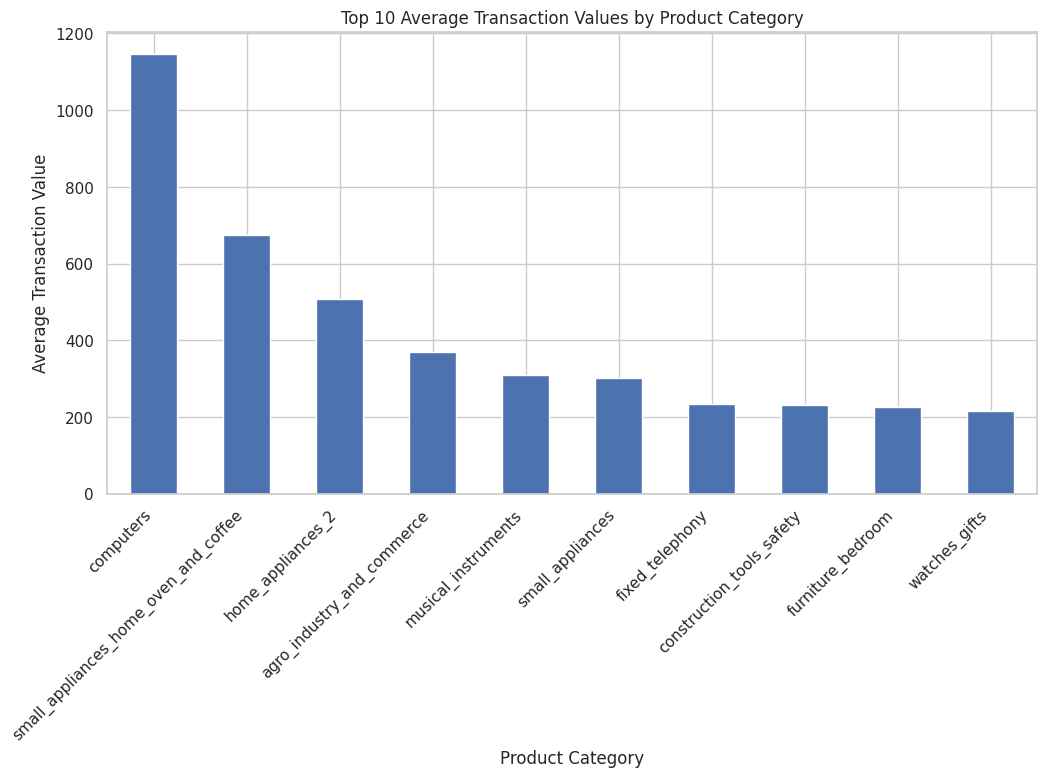

In [130]:
# Calculate average transaction value per product category
avg_transaction_value_per_category = merged_data.groupby('product_category_name_english')['total_price'].mean()

# Sort and get the top 10 product categories
top_n = 10  # Set how many top categories you want to visualize
top_categories = avg_transaction_value_per_category.sort_values(ascending=False).head(top_n)

# Print the average transaction values
print("Top 10 Average Transaction Values by Product Category:")
print(top_categories)

# Visualize the results
top_categories.plot(kind='bar', title='Top 10 Average Transaction Values by Product Category', figsize=(12, 6))
plt.ylabel('Average Transaction Value')
plt.xlabel('Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.show()


The analysis of average transaction values across various product categories reveals that certain categories significantly influence the average spending per transaction. Notably, Computers lead with an average transaction value of 1147.49, followed by Small Appliances (Home, Oven, and Coffee) at 674.60 and Home Appliances at 511.73. Other categories, such as Agro-Industry and Commerce (369.92) and Musical Instruments (310.58), also show substantial transaction values. Conversely, categories like Watches & Gifts have a lower average transaction value of 215.81. This diversity in average transaction values suggests varying consumer preferences and spending behaviors, highlighting opportunities for targeted marketing and inventory focus in higher-value categories.

### 3.2 How do delivery times impact customer satisfaction ratings?

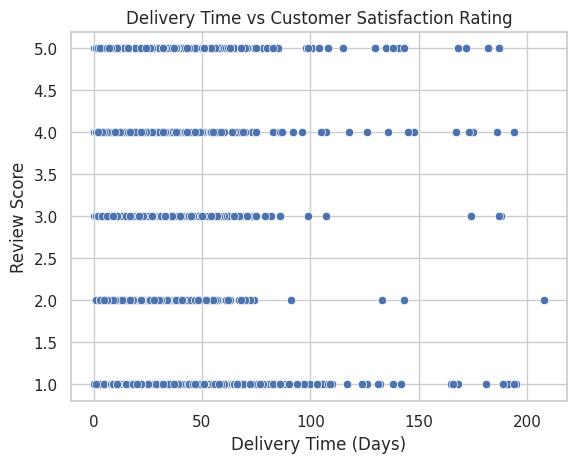

In [131]:
# Plot delivery time vs customer review score using the latest merged DataFrame
sns.scatterplot(data=merged_data, x='delivery_time_days', y='review_score')
plt.title('Delivery Time vs Customer Satisfaction Rating')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Review Score')
plt.show()


The scatter plot shows the relationship between **delivery time** (in days) and **customer satisfaction** (measured by review scores from 1 to 5).

#### Key Observations:
1. **Clustered Review Scores**: The review scores are highly concentrated around specific values (1, 2, 3, 4, and 5), which is expected since these are discrete ratings. There is a clear horizontal banding due to the limited range of review scores.
   
2. **High Review Scores (4 and 5)**:
   - Many customers gave a **4** or **5** star rating regardless of delivery time. Even for deliveries that took more than 100 days, there are still several high ratings.
   - This suggests that some customers may not significantly penalize long delivery times, or perhaps their satisfaction is driven by other factors beyond just delivery time.

3. **Low Review Scores (1 and 2)**:
   - There are also instances of **1** and **2** star ratings across a broad range of delivery times, including shorter deliveries (0 to 50 days).
   - This could indicate that while delivery time may be a factor, other issues (e.g., product quality, customer service) might have influenced these low scores.

4. **Mid-range Review Scores (3)**:
   - Review scores of **3** seem spread across all delivery times, suggesting that moderate satisfaction isn't necessarily tied to how long the delivery took.

#### Hypotheses:
1. **Delivery Time May Not Be the Sole Determinant**: The spread of review scores across a wide range of delivery times implies that delivery time is not the only factor influencing customer satisfaction. Other factors such as product quality, price, and customer service could be equally or more important.
   
2. **Tolerance for Longer Delivery Times**: The presence of high ratings even for long delivery times (e.g., up to 200 days) suggests that some customers may have expectations aligned with longer wait times, possibly due to the nature of the product or prior knowledge of delivery delays.

3. **Possible Outliers**: There are few deliveries with unusually long times (more than 150 days), and it would be interesting to check if these are anomalies or if they are part of a specific segment (e.g., international deliveries or complex orders).



### 3.3 How can we utilize RFM segmentation to tailor marketing strategies for different customer groups, ensuring higher engagement and increased sales?

In [132]:
# Convert order_purchase_timestamp to datetime
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Get the reference date
reference_date = merged_data['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Calculate Recency, Frequency, and Monetary
rfm_data = merged_data.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'total_price': 'sum'  # Monetary
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'total_price': 'Monetary'
}).reset_index()

# Display the RFM DataFrame
print(rfm_data.head())

                        customer_id  Recency  Frequency  Monetary
0  00012a2ce6f8dcda20d059ce98491703      288          1    114.74
1  000161a058600d5901f007fab4c27140      410          1     67.41
2  0001fd6190edaaf884bcaf3d49edf079      548          1    195.42
3  0002414f95344307404f0ace7a26f1d5      379          1    179.35
4  000379cdec625522490c315e70c7a9fb      150          1    107.01


In [133]:
# Define bins for Recency
recency_bins = [0, 30, 60, 90, 180, float('inf')]
recency_labels = ['Very Recent', 'Recent', 'Moderate', 'Old', 'Very Old']

# Define bins for Frequency
frequency_bins = [0, 1, 5, 10, 20, float('inf')]
frequency_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Define bins for Monetary
monetary_bins = [0, 100, 500, 1000, 5000, float('inf')]
monetary_labels = ['Low', 'Medium', 'High', 'Very High', 'Premium']

# Assigning RFM segments
rfm_data['Recency_Group'] = pd.cut(rfm_data['Recency'], bins=recency_bins, labels=recency_labels, right=False)
rfm_data['Frequency_Group'] = pd.cut(rfm_data['Frequency'], bins=frequency_bins, labels=frequency_labels, right=False)
rfm_data['Monetary_Group'] = pd.cut(rfm_data['Monetary'], bins=monetary_bins, labels=monetary_labels, right=False)

# Display the grouped RFM DataFrame
print(rfm_data[['customer_id', 'Recency', 'Frequency', 'Monetary', 'Recency_Group', 'Frequency_Group', 'Monetary_Group']].head())


                        customer_id  Recency  Frequency  Monetary Recency_Group Frequency_Group  \
0  00012a2ce6f8dcda20d059ce98491703      288          1    114.74      Very Old             Low   
1  000161a058600d5901f007fab4c27140      410          1     67.41      Very Old             Low   
2  0001fd6190edaaf884bcaf3d49edf079      548          1    195.42      Very Old             Low   
3  0002414f95344307404f0ace7a26f1d5      379          1    179.35      Very Old             Low   
4  000379cdec625522490c315e70c7a9fb      150          1    107.01           Old             Low   

  Monetary_Group  
0         Medium  
1            Low  
2         Medium  
3         Medium  
4         Medium  


<ipython-input-134-6932b45a04a0>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rfm_segment_counts = rfm_data.groupby(['Recency_Group', 'Frequency_Group']).size().reset_index(name='Count')
<ipython-input-134-6932b45a04a0>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = rfm_segment_counts.pivot_table(index='Recency_Group', columns='Frequency_Group', values='Count', fill_value=0)


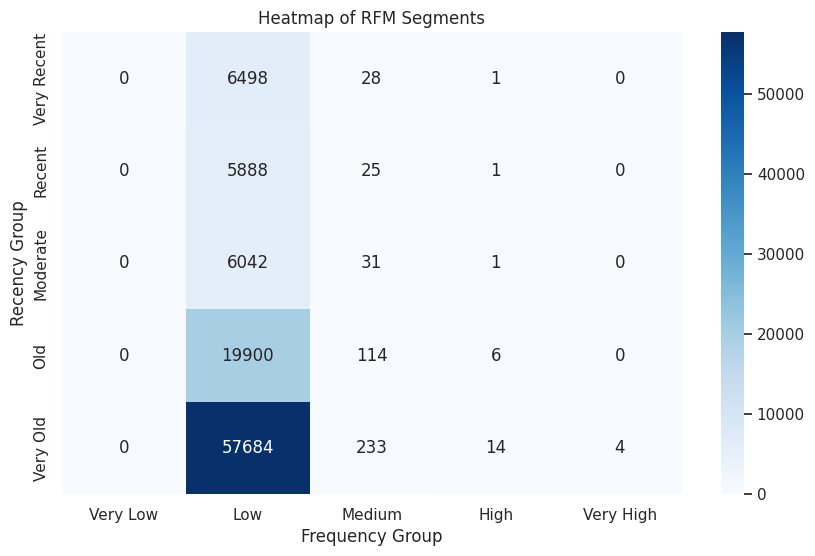

In [134]:
# Heatmap for RFM Segments
rfm_segment_counts = rfm_data.groupby(['Recency_Group', 'Frequency_Group']).size().reset_index(name='Count')

# Pivot the DataFrame for the heatmap using pivot_table()
heatmap_data = rfm_segment_counts.pivot_table(index='Recency_Group', columns='Frequency_Group', values='Count', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g')
plt.title('Heatmap of RFM Segments')
plt.xlabel('Frequency Group')
plt.ylabel('Recency Group')
plt.show()


<ipython-input-135-7c76cd14747b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monetary_df, x='Monetary_Group', y='Customer_Count', palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

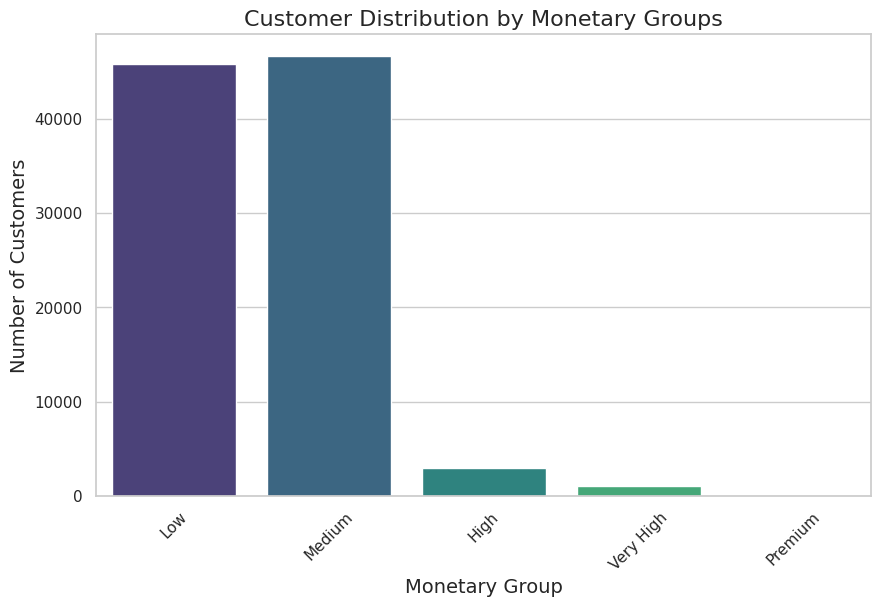

In [135]:
sns.set(style="whitegrid")

# Count the number of customers in each Monetary Group
monetary_counts = rfm_data['Monetary_Group'].value_counts().sort_index()

# Create a DataFrame from the counts for easier plotting
monetary_df = monetary_counts.reset_index()
monetary_df.columns = ['Monetary_Group', 'Customer_Count']

# Create a bar plot for the Monetary Groups
plt.figure(figsize=(10, 6))
sns.barplot(data=monetary_df, x='Monetary_Group', y='Customer_Count', palette='viridis')
plt.title('Customer Distribution by Monetary Groups', fontsize=16)
plt.xlabel('Monetary Group', fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Based on the provided visualizations of the RFM segmentation, here's how we can utilize the data to tailor marketing strategies for different customer groups, ensuring higher engagement and increased sales:

#### 1. **Low Recency (Very Old, Old) & Low Frequency Groups:**
   - **Insights:** The heatmap shows that a significant number of customers fall under the "Very Old" recency group and have a "Low" frequency. These customers are at risk of churning as they haven't made purchases recently and have lower engagement.
   - **Strategy:** A win-back campaign targeting these customers with personalized offers or discounts to reignite their interest could be highly effective. Email reminders, promotions, or incentives for revisiting the platform could help bring them back.

#### 2. **Moderate to Recent Recency, Low to Medium Frequency:**
   - **Insights:** There are customers with "Moderate" and "Recent" recency who still have "Low" frequency. These groups represent potential regular customers who may just need more encouragement or reminders to engage more frequently.
   - **Strategy:** Marketing should focus on increasing their frequency through loyalty programs, cross-selling, or targeted offers that encourage repeat purchases. Messaging should highlight new products, personalized recommendations, or special time-sensitive deals.

#### 3. **Very Recent & Low Frequency Group:**
   - **Insights:** A small number of customers are very recent but have low frequency. This could indicate new customers who have just made their first purchase.
   - **Strategy:** For new customers, onboarding is key. Offering a welcome discount or a personalized follow-up to show appreciation and promote a second purchase will build loyalty and increase engagement. You could introduce them to referral programs or VIP memberships as a long-term strategy.

#### 4. **Old Recency, Higher Frequency Group (High and Medium):**
   - **Insights:** Customers in the "Old" recency group with "Medium" to "High" frequency have shown past engagement but have not purchased recently.
   - **Strategy:** These are valuable customers worth reactivating. Use personalized reactivation emails, reminding them of past favorites, offering limited-time discounts, or promoting products they’ve previously purchased. Tailoring messages to their previous behaviors can enhance relevancy.

#### 5. **Monetary Group Insights:**
   - **Insights from Bar Chart:** Most customers fall within the "Low" and "Medium" monetary value groups, with only a small proportion in "High" and "Very High" monetary groups.
   - **Strategy:** For **low/medium monetary value customers**, personalized cross-selling and upselling campaigns can help increase their average transaction value. For **high-value customers**, offering exclusive deals, premium services, or early access to products will help retain these high spenders and increase their lifetime value.


### 3.4 Conclusion Recommendation


#### Conclusion

1. **Product Categories and Average Transaction Value**:
   - The study reveals that certain product categories, particularly **Computers** and **Small Appliances**, significantly influence average transaction values. This indicates diverse consumer spending behaviors across categories, suggesting targeted marketing efforts to leverage higher-value categories could enhance overall sales.

2. **Delivery Times and Customer Satisfaction**:
   - The scatter plot analysis shows that delivery time alone does not fully determine customer satisfaction ratings. While some customers remain satisfied despite longer delivery times, other factors such as product quality and customer service also play critical roles. Understanding these dynamics can help businesses enhance customer experience beyond just optimizing delivery logistics.

3. **RFM Segmentation for Tailored Marketing**:
   - RFM segmentation presents a robust framework for crafting tailored marketing strategies. By identifying customer behaviors and preferences, businesses can design campaigns that specifically target customer groups based on their recency, frequency, and monetary value.
   - Different strategies should be employed for each segment:
     - **Reactivation Campaigns** for customers who haven’t engaged recently.
     - **Loyalty Programs** for moderate-frequency customers.
     - **Onboarding Incentives** for new customers to encourage repeat purchases.
     - **Personalized Promotions** for customers showing past engagement to renew their interest.

#### Recommendations:

1. **Enhance Targeted Marketing**:
   - Implement marketing campaigns focusing on high-value categories identified in the analysis, using data-driven insights to create personalized offers.

2. **Improve Customer Experience**:
   - Focus on optimizing overall customer experience, including product quality and customer service, to improve satisfaction ratings across various delivery times.

3. **Leverage RFM Insights**:
   - Use RFM segmentation insights to prioritize customer outreach and promotional strategies, ensuring that marketing resources are effectively utilized to maximize customer engagement and retention.

4. **Continuous Data Monitoring**:
   - Regularly monitor transaction values, customer satisfaction, and RFM metrics to adapt marketing strategies in real-time, responding to changing consumer preferences and market trends.

5. **Conduct Further Analysis**:
   - Explore additional factors influencing customer satisfaction and average transaction value, such as seasonality, promotional campaigns, and market competition, to refine marketing approaches further.